<a href="https://colab.research.google.com/github/Alekhyo/Statistics/blob/master/stats_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
delivery=pd.read_csv('deliveries.csv')

# Q1-- Based on IPL dataset, create a function which will accept a batsman name and 1 interger value and returns the number of runs he has scored after those many matches

In [0]:
def runs_after(name,match):
    try:
        a=delivery[delivery['batsman']==name].groupby(['match_id'])['batsman_runs'].sum().reset_index()
    
        runs=list(a['batsman_runs'].values)

        for i in range(1,len(runs)):
            runs[i]=runs[i]+runs[i-1]
        
        print(runs[int(match)-1])
        
    
    except:
        print("Enter correct name and match value")

In [0]:
runs_after('V Kohli',18)

401


# Q2-- Plot Histogram for all fearutes of the data set and write comments on which feature is best for predicting survival status.

In [0]:
hb=pd.read_csv('haberman.csv')

In [0]:
hb

,age,year,nodes,survive
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


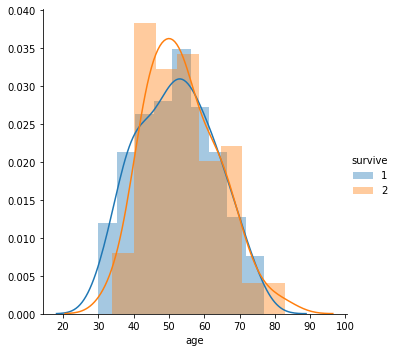

In [0]:
sns.FacetGrid(hb,hue='survive',height=5).map(sns.distplot,'age').add_legend()

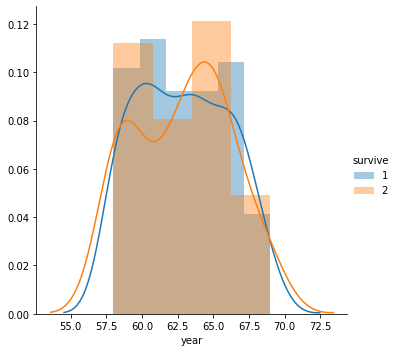

In [0]:
sns.FacetGrid(hb,hue='survive',height=5).map(sns.distplot,'year').add_legend()

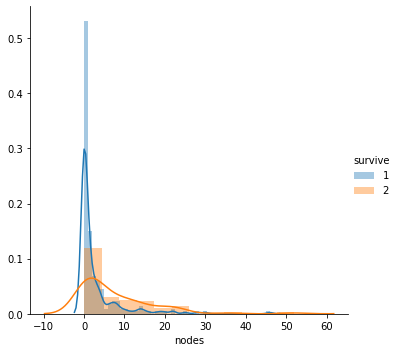

In [0]:
sns.FacetGrid(hb,hue='survive',height=5).map(sns.distplot,'nodes').add_legend()

# Survive VS node is the most preferred one because the overlapping of two PDF is least among the others

# Q3: Write a function which will plot the match wise scores of two batsman

In [0]:
def plot_score(nameA,nameB):
    try:
        a=delivery[delivery['batsman']==nameA]
        b=delivery[delivery['batsman']==nameB]

        a=a.groupby('match_id')['batsman_runs'].sum().reset_index()
        b=b.groupby('match_id')['batsman_runs'].sum().reset_index()

        a.drop(['match_id'],axis=1,inplace=True)
        b.drop(['match_id'],axis=1,inplace=True)

        a['batsman']=nameA
        b['batsman']=nameB

        c=pd.concat([a,b])
        return(sns.FacetGrid(c,hue='batsman',height=5).map(sns.distplot,'batsman_runs').add_legend())
    except:
        print("Enter Proper Names")

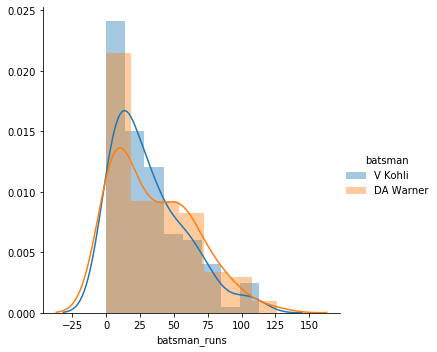

In [0]:
plot_score('V Kohli','DA Warner')

# Q4-- Write a function which will take a list as input and in return plot PDF and CDF curve

In [0]:
a=np.array([1,2,6,5,7,8,9,5,4,6,3,2,5,8,9,2,7,9,5,4,3,8,6,3,2,4,8,6,4,3,4,8,6,5])

In [0]:
counts,div=np.histogram(a,bins=10)

In [0]:
pdf=counts/sum(counts)

In [0]:
cdf=list(pdf)

In [0]:
for i in range(1,len(pdf)):
    cdf[i]=cdf[i]+cdf[i-1]

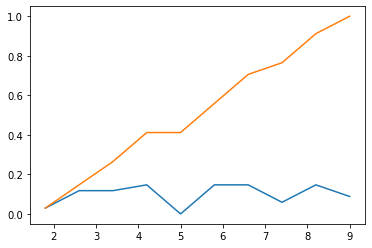

In [0]:
plt.plot(div[1:],pdf)
plt.plot(div[1:],cdf)